# Zależność oporu elektrycznego metalu i półprzewodnika od temperatury

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import linearregression

## Inicjalizacja danych

In [2]:
# Inicjalizacja stałych
K = 273.15 # 0 stopni Celcjusza w Kelwinach

# Wczytanie danych z pliku csv
dane_rosnaco = pd.read_csv('Sprawozdanie9_rosnaco.csv', delimiter=';')
dane_malejaco = pd.read_csv('Sprawozdanie9_malejaco.csv', delimiter=';')

dane_rosnaco = dane_rosnaco.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
dane_rosnaco = dane_rosnaco.apply(pd.to_numeric, errors='ignore')

dane_malejaco = dane_malejaco.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
dane_malejaco = dane_malejaco.apply(pd.to_numeric, errors='ignore')

x_rosnaco = dane_rosnaco['Temperatura'].to_numpy()
y_R1_rosnaco = dane_rosnaco['R1'].to_numpy()
y_R2_rosnaco = dane_rosnaco['R2'].to_numpy()
y_R3_rosnaco = dane_rosnaco['R3'].to_numpy()

x_malejaco = dane_malejaco['Temperatura'].to_numpy()
y_R1_malejaco = dane_malejaco['R1'].to_numpy()
y_R2_malejaco = dane_malejaco['R2'].to_numpy()
y_R3_malejaco = dane_malejaco['R3'].to_numpy()

print(x_rosnaco, y_R1_rosnaco, y_R2_rosnaco, y_R3_rosnaco)
print(x_malejaco, y_R1_malejaco, y_R2_malejaco, y_R3_malejaco)

[ 18.2  20.   22.   24.   26.   28.   30.   32.   34.   36.   38.   40.
  42.   44.   46.   48.   50.   52.   54.   56.   58.   60.   62.   64.
  66.   68.   70.   72.   74.   76.   78.   80.   82.   84.   86.   88.
  90.   92.   94.   96.   98.  100. ] [0.22  0.223 0.225 0.227 0.229 0.231 0.233 0.234 0.236 0.237 0.239 0.241
 0.242 0.244 0.245 0.246 0.248 0.249 0.25  0.252 0.253 0.255 0.256 0.257
 0.258 0.259 0.261 0.262 0.263 0.265 0.266 0.268 0.27  0.271 0.273 0.274
 0.276 0.277 0.279 0.281 0.283 0.284] [0.62  0.621 0.621 0.621 0.621 0.621 0.621 0.62  0.621 0.621 0.621 0.621
 0.62  0.62  0.621 0.62  0.62  0.62  0.62  0.62  0.62  0.62  0.62  0.62
 0.62  0.62  0.62  0.62  0.62  0.619 0.619 0.618 0.619 0.619 0.618 0.619
 0.619 0.619 0.619 0.619 0.619 0.619] [0.199 0.167 0.149 0.134 0.122 0.112 0.102 0.095 0.088 0.081 0.076 0.07
 0.066 0.061 0.058 0.054 0.051 0.048 0.046 0.043 0.041 0.039 0.037 0.035
 0.033 0.032 0.03  0.029 0.027 0.025 0.024 0.022 0.021 0.02  0.019 0.018
 0.017 0.016 0.

/tmp/ipykernel_194137/4288990550.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dane_rosnaco = dane_rosnaco.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
/tmp/ipykernel_194137/4288990550.py:9: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  dane_rosnaco = dane_rosnaco.apply(pd.to_numeric, errors='ignore')
/tmp/ipykernel_194137/4288990550.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dane_malejaco = dane_malejaco.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
/tmp/ipykernel_194137/4288990550.py:12: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  dane_malejaco = dane_malejaco.apply(pd.to_numeric, errors='ignore')


## Wykresy dla danych rosnąco

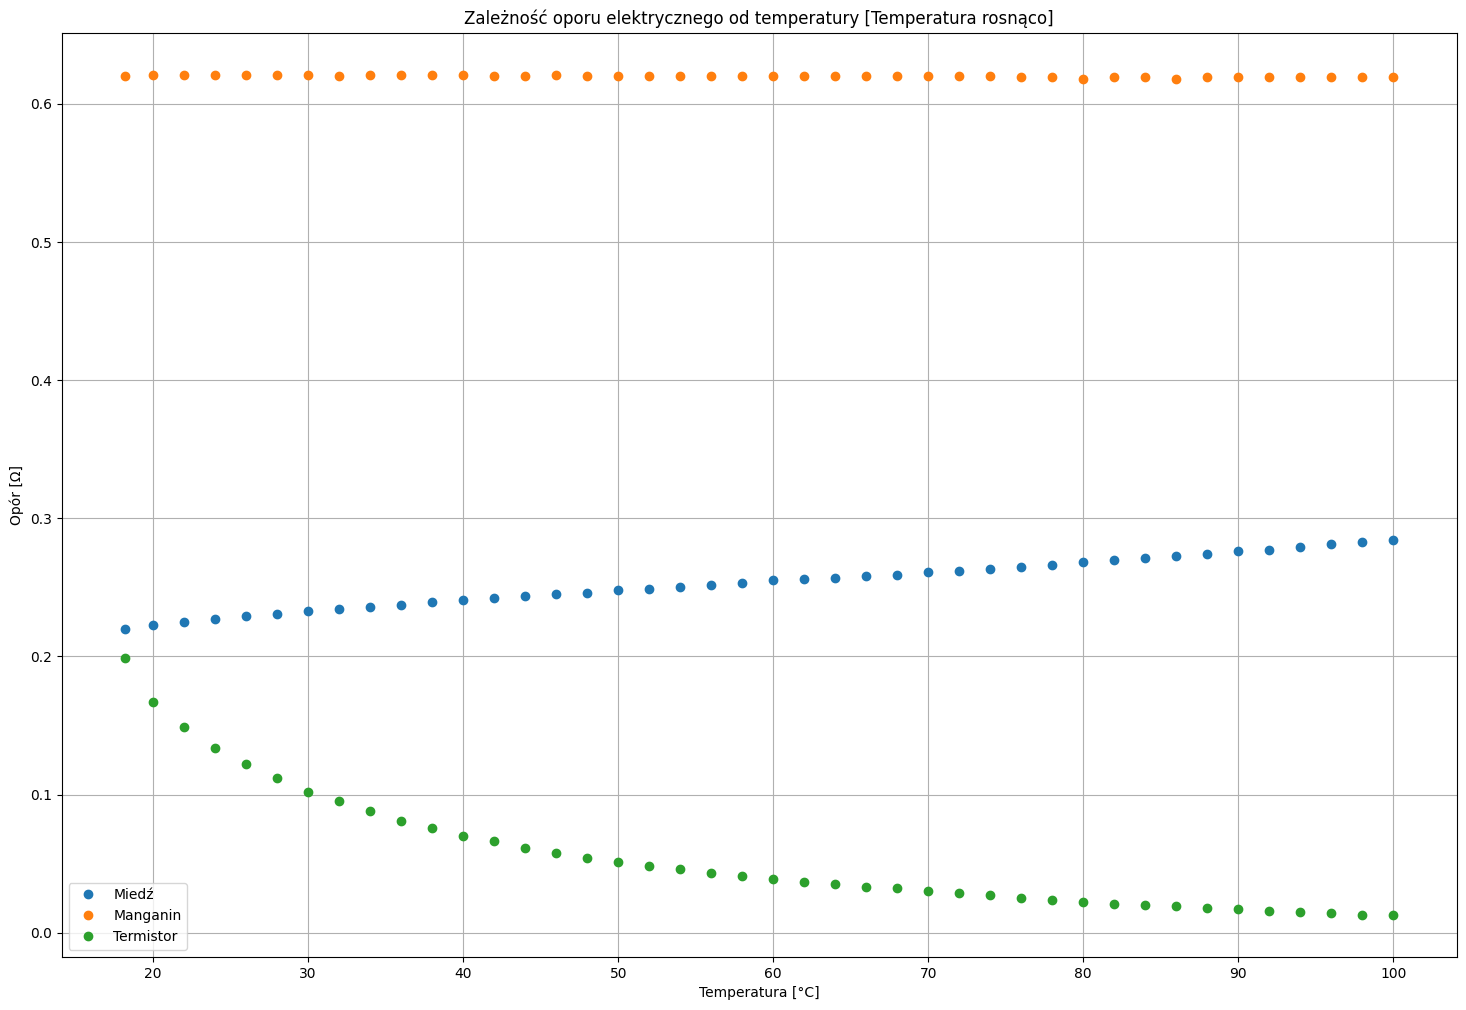

In [3]:
plt.figure(figsize=(18, 12))

plt.plot(x_rosnaco, y_R1_rosnaco, 'o', label='Miedź')
plt.plot(x_rosnaco, y_R2_rosnaco, 'o', label='Manganin')
plt.plot(x_rosnaco, y_R3_rosnaco, 'o', label='Termistor')
plt.title("Zależność oporu elektrycznego od temperatury [Temperatura rosnąco]")
plt.xlabel("Temperatura [°C]")
plt.ylabel("Opór [Ω]")
plt.legend()
plt.grid(True)
plt.show()

## Wykresy dla danych rosnąco - regresja

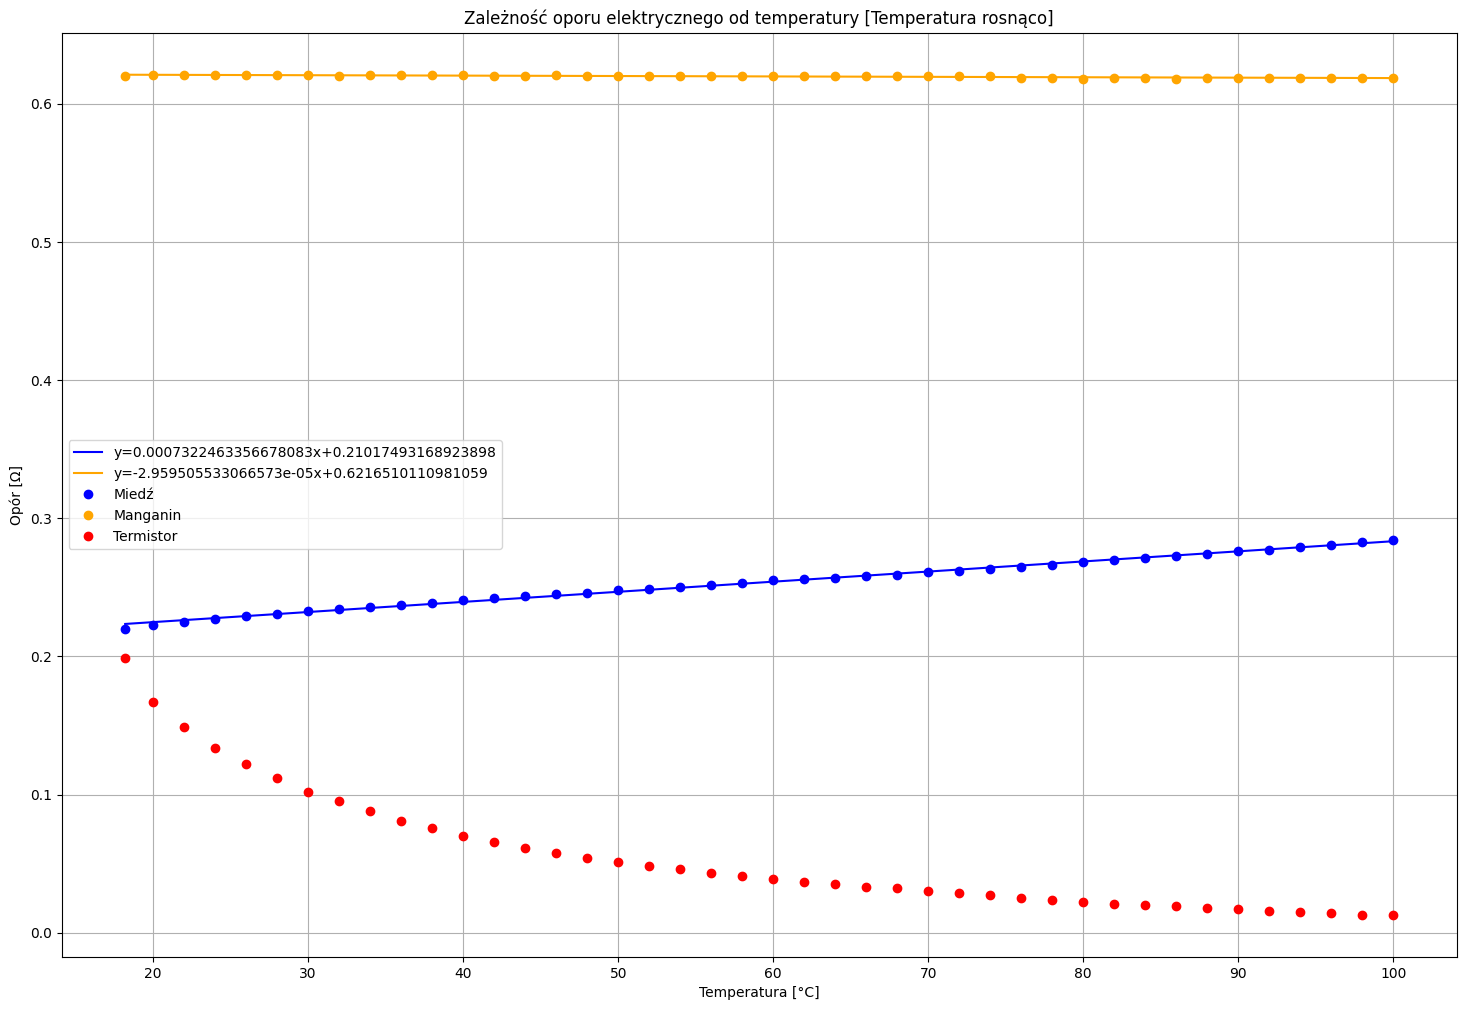

In [7]:
a_R1_rosnaco, b_R1_rosnaco = linearregression.LinearRegression().fit(x_rosnaco, y_R1_rosnaco)
a_R2_rosnaco, b_R2_rosnaco = linearregression.LinearRegression().fit(x_rosnaco, y_R2_rosnaco)

y_R3_rosnaco_funkcja = np.log(y_R3_rosnaco)
x_R3_rosnaco_funkcja = 1/(x_rosnaco+K)
a_R3_rosnaco, b_R3_rosnaco = linearregression.LinearRegression().fit(x_R3_rosnaco_funkcja, y_R3_rosnaco_funkcja)

plt.figure(figsize=(18, 12))
plt.plot(x_rosnaco, a_R1_rosnaco * x_rosnaco + b_R1_rosnaco, label=f'y={a_R1_rosnaco}x+{b_R1_rosnaco}', color='blue')
plt.plot(x_rosnaco, a_R2_rosnaco * x_rosnaco + b_R2_rosnaco, label=f'y={a_R2_rosnaco}x+{b_R2_rosnaco}', color='orange')
# plt.plot(x_rosnaco, np.exp(a_R3_rosnaco * x_R3_rosnaco_funkcja + b_R3_rosnaco), label=f'Termistor Trend', color='red')
plt.plot(x_rosnaco, y_R1_rosnaco, 'o', label='Miedź', color='blue')
plt.plot(x_rosnaco, y_R2_rosnaco, 'o', label='Manganin', color='orange')
plt.plot(x_rosnaco, y_R3_rosnaco, 'o', label='Termistor', color='red')
plt.title("Zależność oporu elektrycznego od temperatury [Temperatura rosnąco]")
plt.xlabel("Temperatura [°C]")
plt.ylabel("Opór [Ω]")
plt.legend()
plt.grid(True)

In [13]:
# Niepewność współczynnika a
S_y_r1_rosnaco = np.sqrt(sum(y_R1_rosnaco - a_R1_rosnaco*x_rosnaco+b_R1_rosnaco)**2/(len(y_R1_rosnaco)-2))
S_y_r2_rosnaco = np.sqrt(sum(y_R2_rosnaco - a_R2_rosnaco*x_rosnaco+b_R2_rosnaco)**2/(len(y_R2_rosnaco)-2))
S_y_r3_rosnaco = np.sqrt(sum(y_R3_rosnaco - np.exp(a_R3_rosnaco*x_R3_rosnaco_funkcja+b_R3_rosnaco)**2/(len(y_R3_rosnaco)-2)))

D_y_r1_rosnaco = len(y_R1_rosnaco)*sum(x_rosnaco**2) - (sum(x_rosnaco))**2
D_y_r2_rosnaco = len(y_R2_rosnaco)*sum(x_rosnaco**2) - (sum(x_rosnaco))**2
D_y_r3_rosnaco = len(y_R3_rosnaco)*sum(x_R3_rosnaco_funkcja**2) - (sum(x_R3_rosnaco_funkcja))**2

u_a_r1_rosnaco = S_y_r1_rosnaco*np.sqrt(len(y_R1_rosnaco)/D_y_r1_rosnaco)
u_a_r2_rosnaco = S_y_r2_rosnaco*np.sqrt(len(y_R2_rosnaco)/D_y_r2_rosnaco)
u_a_r3_rosnaco = S_y_r3_rosnaco*np.sqrt(len(y_R3_rosnaco)/D_y_r3_rosnaco)
print(f'Niepewność współczynnika a dla R1: {u_a_r1_rosnaco}')
print(f'Niepewność współczynnika a dla R2: {u_a_r2_rosnaco}')
print(f'Niepewność współczynnika a dla R3: {u_a_r3_rosnaco}')

Niepewność współczynnika a dla R1: 0.01777395267258477
Niepewność współczynnika a dla R2: 0.05257142496165694
Niepewność współczynnika a dla R3: 1065.9171908760188


## Wykresy dla danych rosnąco - paski błędów

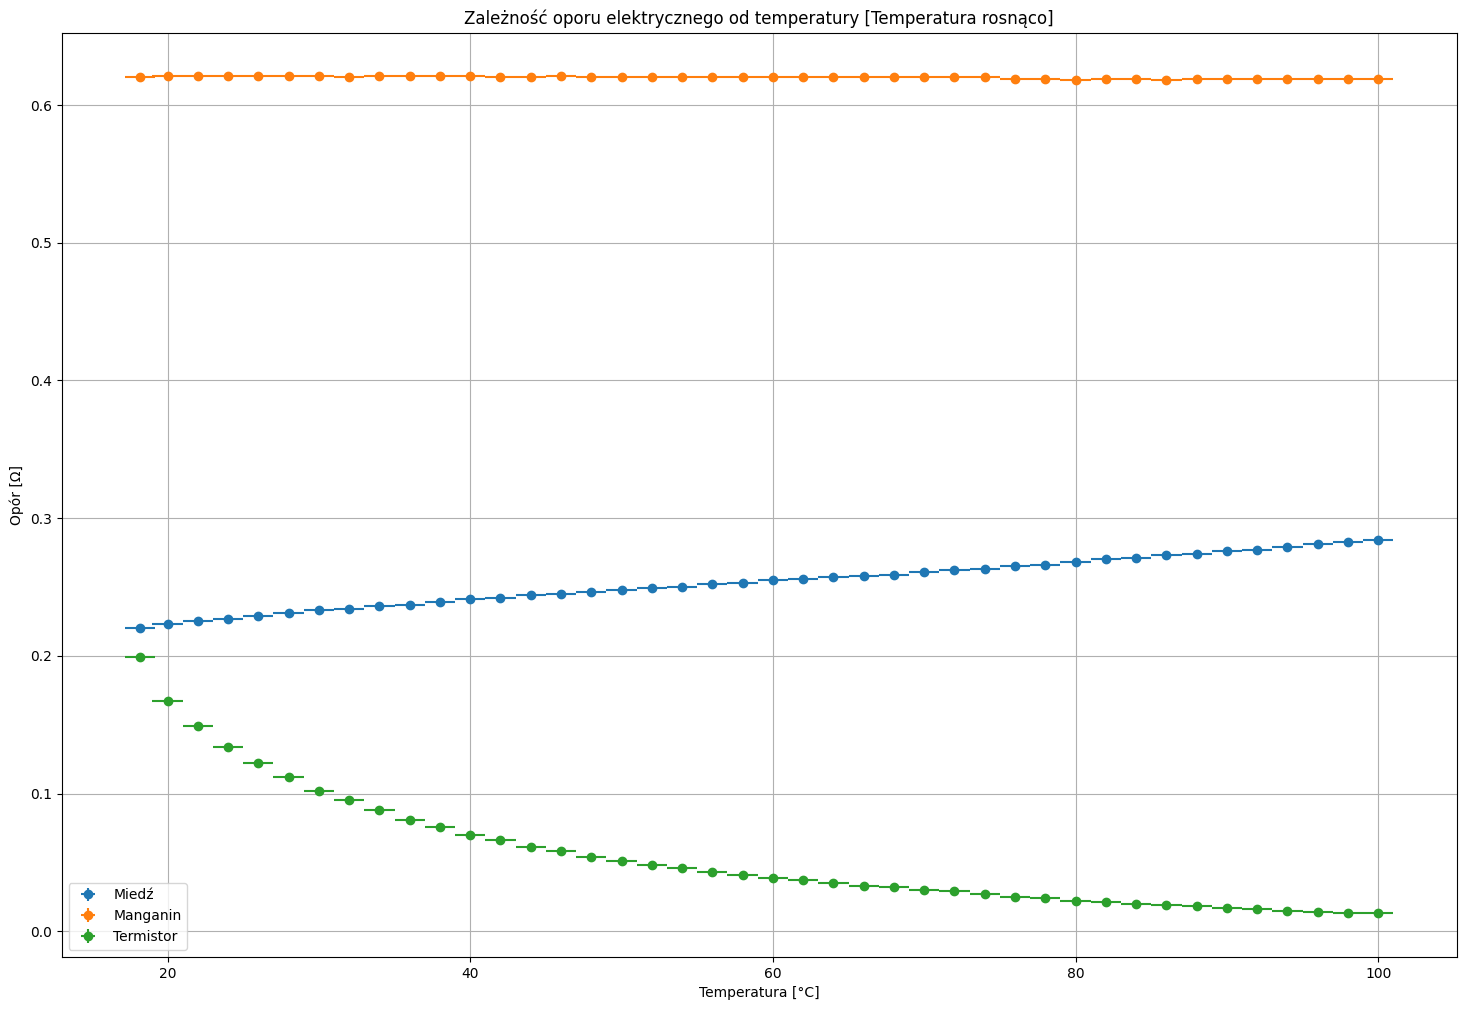

In [10]:
x_err = 1
y_err = 0.001

plt.figure(figsize=(18, 12))

plt.errorbar(x_rosnaco, y_R1_rosnaco, xerr=x_err, yerr=y_err, fmt='o', label='Miedź')
plt.errorbar(x_rosnaco, y_R2_rosnaco, xerr=x_err, yerr=y_err, fmt='o', label='Manganin')
plt.errorbar(x_rosnaco, y_R3_rosnaco, xerr=x_err, yerr=y_err, fmt='o', label='Termistor')
plt.title("Zależność oporu elektrycznego od temperatury [Temperatura rosnąco]")
plt.xlabel("Temperatura [°C]")
plt.ylabel("Opór [Ω]")
plt.legend()
plt.grid(True)

## Wykresy dla danych rosnaco - regresja - termistor

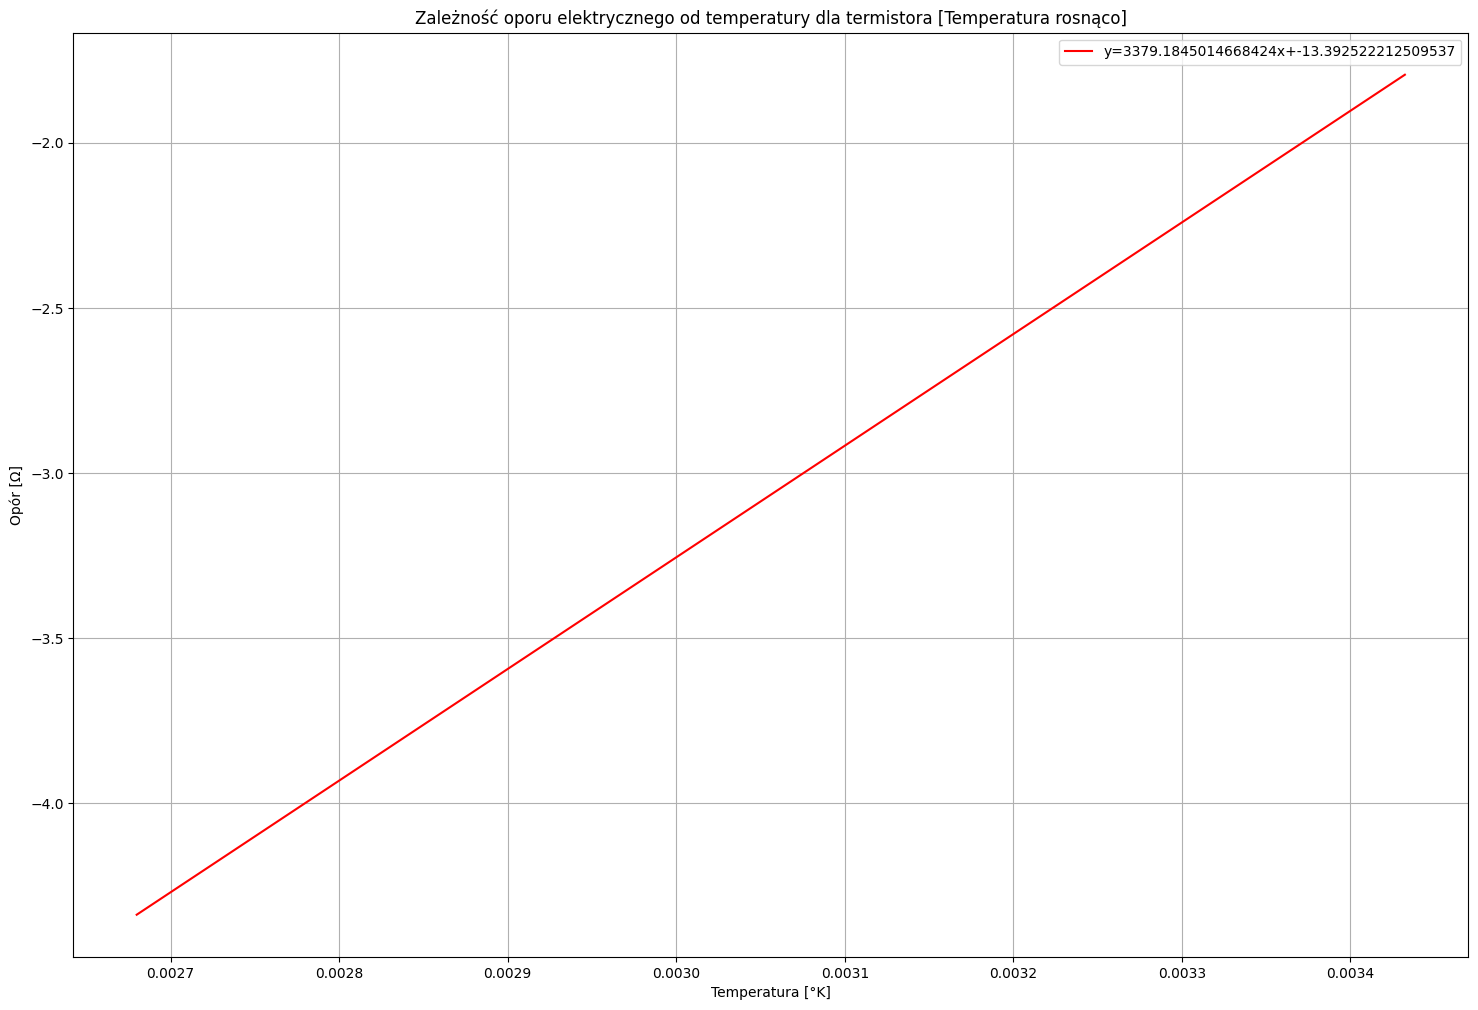

In [8]:
plt.figure(figsize=(18, 12))

# plt.plot(x_R3_rosnaco_funkcja, a_R3_rosnaco * x_R3_rosnaco_funkcja + b_R3_rosnaco, label=f'Termistor Trend', color='red')
plt.plot(x_R3_rosnaco_funkcja, a_R3_rosnaco*x_R3_rosnaco_funkcja+b_R3_rosnaco, label=f'y={a_R3_rosnaco}x+{b_R3_rosnaco}', color='red')
plt.title("Zależność oporu elektrycznego od temperatury dla termistora [Temperatura rosnąco]")
plt.xlabel("Temperatura [°K]")
plt.ylabel("Opór [Ω]")
plt.legend()
plt.grid(True)
plt.show()